In [150]:
import sys
print(sys.version)
%pwd

3.6.6 | packaged by conda-forge | (default, Jul 26 2018, 11:48:23) [MSC v.1900 64 bit (AMD64)]


'C:\\Users\\chrun\\Documents\\Projects\\Deep Learning\\structured data\\House Prices'

In [151]:
from fastai.structured import *
from fastai.column_data import *

In [152]:
PATH = 'data/'

In [153]:
pd.read_csv(PATH + 'sample_submission.csv').head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [154]:
from IPython.display import HTML, display
table_names = ['test', 'train']
tables = [pd.read_csv(f'{PATH}{fname}.csv', low_memory=False) for fname in table_names]

for t in tables: display(t.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [155]:
test, train = tables

In [156]:
len(train),len(test)

(1460, 1459)

In [157]:
train.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
                 ...  
BedroomAbvGr     False
KitchenAbvGr     False
KitchenQual      False
TotRmsAbvGrd     False
Functional       False
Fireplaces       False
FireplaceQu       True
GarageType        True
GarageYrBlt       True
GarageFinish      True
GarageCars       False
GarageArea       False
GarageQual 

In [158]:
train.head().T.head(82)

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [159]:
test.head().T.head(82)

,0,1,2,3,4
Id,1461,1462,1463,1464,1465
MSSubClass,20,20,60,60,120
MSZoning,RH,RL,RL,RL,RL
LotFrontage,80,81,74,78,43
LotArea,11622,14267,13830,9978,5005
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,IR1,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,HLS
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [160]:
test['SalePrice'] = 0

In [161]:
len(train.columns), len(test.columns)

(81, 81)

In [164]:
for df in train, test:
    df['YearRemodDiff'] = df['YearBuilt'] - df['YearRemodAdd']
    df['SoldDate'] = pd.to_datetime(df['YrSold'].astype(str) + df['MoSold'].astype(str), format='%Y%m')
    add_datepart(df, "SoldDate", drop=False)
    df['BuiltDate'] = pd.to_datetime(df['YearBuilt'].astype(str), format='%Y')
    add_datepart(df, "BuiltDate", drop=False)
    df.drop('Utilities', 1, inplace = True)
    df.drop(train['Id'][train['GrLivArea'] >= 4000], inplace = True)

In [167]:
train.isna().sum()

Id                          0
MSSubClass                  0
MSZoning                    0
LotFrontage               259
LotArea                     0
Street                      0
Alley                    1366
LotShape                    0
LandContour                 0
LotConfig                   0
LandSlope                   0
Neighborhood                0
Condition1                  0
Condition2                  0
BldgType                    0
HouseStyle                  0
OverallQual                 0
OverallCond                 0
YearBuilt                   0
YearRemodAdd                0
RoofStyle                   0
RoofMatl                    0
Exterior1st                 0
Exterior2nd                 0
MasVnrType                  8
MasVnrArea                  8
ExterQual                   0
ExterCond                   0
Foundation                  0
BsmtQual                   37
                         ... 
SalePrice                   0
YearRemodDiff               0
SoldDate  

In [168]:
#pd.set_option('display.max_rows', 120)
train.T.head(200)

,0,1,2,3,4,5,6,7,8,9,...,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459
Id,1,2,3,4,5,6,7,8,9,10,...,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460
MSSubClass,60,20,60,70,60,50,20,60,50,190,...,90,20,180,20,20,60,20,70,20,20
MSZoning,RL,RL,RL,RL,RL,RL,RL,RL,RM,RL,...,RL,RL,RM,RL,FV,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84,85,75,NaN,51,50,...,60,78,35,90,62,62,85,66,68,75
LotArea,8450,9600,11250,9550,14260,14115,10084,10382,6120,7420,...,9000,9262,3675,17217,7500,7917,13175,9042,9717,9937
Street,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,...,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Pave,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1,IR1,Reg,IR1,Reg,Reg,...,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,...,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl
LotConfig,Inside,FR2,Inside,Corner,FR2,Inside,Inside,Corner,Inside,Corner,...,FR2,Inside,Inside,Inside,Inside,Inside,Inside,Inside,Inside,Inside


In [169]:
cat_vars = ['MSSubClass', 'MSZoning', 'Street',
       'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition', 'MoSold', 'YrSold', 'YearRemodDiff', 'YearBuilt', 'GarageYrBlt',
       'Fireplaces', 'YearRemodAdd', 'GarageCars', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',]

contin_vars = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 
               'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
               'LowQualFinSF', 'GrLivArea',  'GarageArea', 
               'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

n = len(train); n

1456

In [170]:
dep = 'SalePrice'
train_df = train[cat_vars + contin_vars + [dep, 'SoldDate']].copy()

In [171]:
test[dep] = 0
test_df = test[cat_vars + contin_vars + [dep, 'SoldDate', 'Id']].copy()

In [172]:
for v in cat_vars: train_df[v] = train_df[v].astype('category').cat.as_ordered()
apply_cats(test_df, train_df)

In [173]:
#imputer = Imputer()
#values = train_df[contin_vars].values
#train_df[contin_vars] = imputer.fit_transform(train_df[contin_vars])
#values = test_df[contin_vars].values
#test_df[contin_vars] = imputer.fit_transform(test_df[contin_vars])

for v in contin_vars:
    train_df[v] = train_df[v].fillna(0).astype('float32')
    test_df[v] = test_df[v].fillna(0).astype('float32')
    
train_df[dep] = train_df[dep].astype('float32')
test_df[dep] = test_df[dep].astype('float32')

In [174]:
train_indexed = train_df.set_index("SoldDate")

In [247]:
df, y, nas, mapper = proc_df(train_indexed, 'SalePrice', do_scale=True)

In [248]:
test_indexed = test_df.set_index("SoldDate")

In [249]:
df_test, _, nas, mapper = proc_df(test_indexed, 'SalePrice', do_scale=True, 
                                  skip_flds=['Id'], mapper=mapper, na_dict=nas)

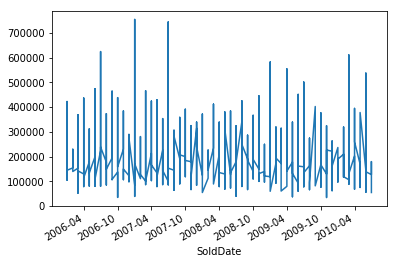

In [250]:
train_indexed.SalePrice.plot()

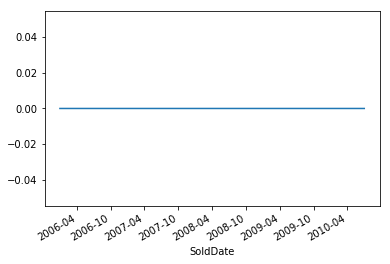

In [251]:
test_indexed.SalePrice.plot()

In [252]:
len(train_indexed), len(test_indexed)

(1456, 1455)

In [253]:
samp_size = n
train_ratio = 0.2
val_idx = get_cv_idxs(n, val_pct=train_ratio) #list(range(train_size, len(df)))

In [254]:
len(df), len(val_idx), len(val_idx) / len(df) * 100

(1456, 291, 19.986263736263737)

In [255]:
from sklearn.metrics import mean_squared_error

def exp_rmse(y_pred, targ):
    return math.sqrt(mean_squared_error(targ, y_pred))

In [256]:
yl = np.log(y)
max_y = np.max(yl)
y_range = (0, max_y*1.2)

In [257]:
len(val_idx), len(y)

(291, 1456)

In [270]:
md = ColumnarModelData.from_data_frame(PATH, val_idx, df, yl, cat_flds=cat_vars, bs=1,
                                       test_df=df_test)

In [271]:
cat_sz = [(c, len(train_df[c].cat.categories)+1) for c in cat_vars]

In [272]:
cat_sz

[('MSSubClass', 16),
 ('MSZoning', 6),
 ('Street', 3),
 ('Alley', 3),
 ('LotShape', 5),
 ('LandContour', 5),
 ('LotConfig', 6),
 ('LandSlope', 4),
 ('Neighborhood', 26),
 ('Condition1', 10),
 ('Condition2', 9),
 ('BldgType', 6),
 ('HouseStyle', 9),
 ('OverallQual', 11),
 ('OverallCond', 10),
 ('RoofStyle', 7),
 ('RoofMatl', 9),
 ('Exterior1st', 16),
 ('Exterior2nd', 17),
 ('MasVnrType', 5),
 ('ExterQual', 5),
 ('ExterCond', 6),
 ('Foundation', 7),
 ('BsmtQual', 5),
 ('BsmtCond', 5),
 ('BsmtExposure', 5),
 ('BsmtFinType1', 7),
 ('BsmtFinType2', 7),
 ('Heating', 7),
 ('HeatingQC', 6),
 ('CentralAir', 3),
 ('Electrical', 6),
 ('KitchenQual', 5),
 ('Functional', 8),
 ('FireplaceQu', 6),
 ('GarageType', 7),
 ('GarageFinish', 4),
 ('GarageQual', 6),
 ('GarageCond', 6),
 ('PavedDrive', 4),
 ('PoolQC', 4),
 ('Fence', 5),
 ('MiscFeature', 5),
 ('SaleType', 10),
 ('SaleCondition', 7),
 ('MoSold', 13),
 ('YrSold', 6),
 ('YearRemodDiff', 110),
 ('YearBuilt', 113),
 ('GarageYrBlt', 98),
 ('Fireplac

In [273]:
emb_szs = [(c, max(5, min(10, (c+1)//2))) for _,c in cat_sz]

In [274]:
emb_szs

[(16, 8),
 (6, 5),
 (3, 5),
 (3, 5),
 (5, 5),
 (5, 5),
 (6, 5),
 (4, 5),
 (26, 10),
 (10, 5),
 (9, 5),
 (6, 5),
 (9, 5),
 (11, 6),
 (10, 5),
 (7, 5),
 (9, 5),
 (16, 8),
 (17, 9),
 (5, 5),
 (5, 5),
 (6, 5),
 (7, 5),
 (5, 5),
 (5, 5),
 (5, 5),
 (7, 5),
 (7, 5),
 (7, 5),
 (6, 5),
 (3, 5),
 (6, 5),
 (5, 5),
 (8, 5),
 (6, 5),
 (7, 5),
 (4, 5),
 (6, 5),
 (6, 5),
 (4, 5),
 (4, 5),
 (5, 5),
 (5, 5),
 (10, 5),
 (7, 5),
 (13, 7),
 (6, 5),
 (110, 10),
 (113, 10),
 (98, 10),
 (5, 5),
 (62, 10),
 (6, 5),
 (5, 5),
 (4, 5),
 (5, 5),
 (4, 5),
 (9, 5),
 (5, 5),
 (13, 7)]

In [275]:
import warnings; warnings.simplefilter('ignore')

In [276]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)

In [265]:
m.lr_find()

 34%|██████████████████████▉                                             | 393/1165 [00:16<00:32, 23.93it/s, loss=1.16]

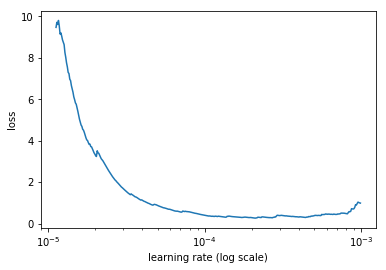

In [266]:
m.sched.plot()

In [277]:
lr = 1e-4 #0.0005

 17%|███████████▍                                                        | 197/1165 [00:23<01:53,  8.56it/s, loss=5.14]

In [278]:
m.fit(lr, 2, cycle_len = 5, metrics=[exp_rmse])

epoch      trn_loss   val_loss   exp_rmse                                                                              
    0      0.145401   0.220941   0.379901  
    1      0.164558   0.148263   0.294716                                                                              
    2      0.120763   0.117941   0.259193                                                                              
    3      0.047924   0.076483   0.221073                                                                              
    4      0.034465   0.07159    0.218458                                                                              
    5      0.079169   0.136467   0.302269                                                                              
    6      0.128309   0.180224   0.26492                                                                               
    7      0.08546    0.11052    0.212865                                                                           

[0.08619435418612617, 0.1857194424808184]

In [279]:
m.save("houseprices_10E")

In [205]:
m.load("houseprices_10E")

In [280]:
m.fit(lr, 2, cycle_len = 3, cycle_mult = 2, metrics=[exp_rmse])

epoch      trn_loss   val_loss   exp_rmse                                                                              
    0      0.0601     0.078819   0.218737  
    1      0.061144   0.073064   0.184129                                                                              
    2      0.034303   0.071039   0.175646                                                                              
    3      0.105512   0.065271   0.20645                                                                               
    4      0.105282   0.076027   0.171377                                                                              
    5      0.022367   0.068017   0.179918                                                                              
    6      0.022764   0.054929   0.151679                                                                              
    7      0.017258   0.048982   0.150532                                                                           

[0.048620357792532466, 0.1521950130353266]

In [281]:
m.save("houseprices_10E9ER") 

In [61]:
m.load("houseprices_10E9ER")

In [282]:
m.fit(lr, 3, cycle_len = 3, cycle_mult = 2, metrics=[exp_rmse])

epoch      trn_loss   val_loss   exp_rmse                                                                              
    0      0.025088   0.059822   0.182133  
    1      0.015441   0.066117   0.157373                                                                              
    2      0.020717   0.058837   0.155083                                                                              
    3      0.026705   0.091474   0.184769                                                                              
    4      0.023008   0.050326   0.169821                                                                              
    5      0.019323   0.048539   0.153773                                                                              
    6      0.009499   0.041905   0.142716                                                                              
    7      0.009202   0.038081   0.141013                                                                           

[0.035367535914876895, 0.13445173190760965]

# Test Set

In [239]:
x,y=m.predict_with_targs()
x = torch.from_numpy(x)
y = torch.from_numpy(y)
exp_rmse(x,y)

0.22558076860855641

best: 0.17828011827502502

In [212]:
log_preds = m.predict(True)

In [213]:
log_preds

array([[11.70228],
       [13.56353],
       [12.12522],
       ...,
       [12.09929],
       [11.50701],
       [12.31546]], dtype=float32)

In [214]:
log_test = np.exp(log_preds)

In [215]:
log_test

array([[120847.28],
       [777261.3 ],
       [184466.67],
       ...,
       [179744.02],
       [ 99409.96],
       [223118.92]], dtype=float32)

In [216]:
test['SalePrice'] = log_test

In [217]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,BuiltDay,BuiltDayofweek,BuiltDayofyear,BuiltIs_month_end,BuiltIs_month_start,BuiltIs_quarter_end,BuiltIs_quarter_start,BuiltIs_year_end,BuiltIs_year_start,BuiltElapsed
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,Inside,...,1,6,1,False,True,False,True,False,True,-283996800
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,Corner,...,1,2,1,False,True,False,True,False,True,-378691200
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,Inside,...,1,2,1,False,True,False,True,False,True,852076800
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,Inside,...,1,3,1,False,True,False,True,False,True,883612800
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,Inside,...,1,2,1,False,True,False,True,False,True,694224000


In [218]:
csv_fn=f'{PATH}submission.csv'

test[['Id','SalePrice']].to_csv(csv_fn, index=False)

In [219]:
test[['Id','SalePrice']]

,Id,SalePrice
0,1461,120847.281250
1,1462,777261.312500
2,1463,184466.671875
3,1464,188762.312500
4,1465,168701.281250
5,1466,151990.734375
6,1467,152928.968750
7,1468,163101.296875
8,1469,173149.156250
9,1470,127993.054688
